In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape


(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]

In [6]:
single_image.shape

(28, 28)

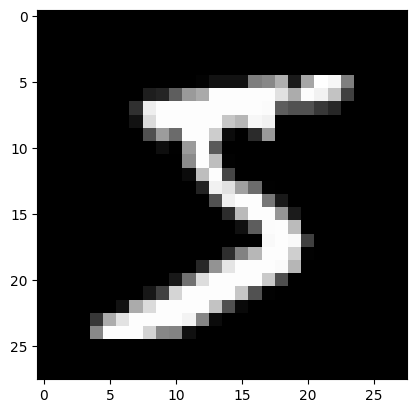

In [7]:
plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape


(60000,)

In [9]:
X_train.min()


0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [14]:
y_train[0]

5

In [15]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [16]:
type(y_train_onehot)

numpy.ndarray

In [17]:
y_train_onehot.shape


(60000, 10)

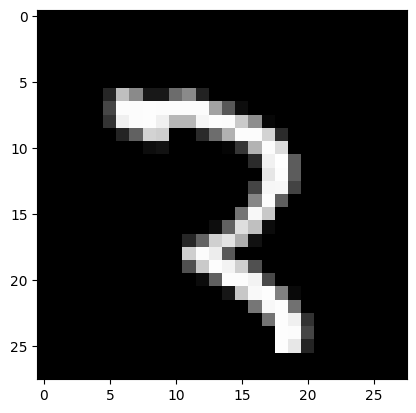

In [18]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [19]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [21]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 173738 (678.66 KB)
Trainable params: 173738 (678.66 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [24]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 32s 33ms/step - loss: 0.2177 - accuracy: 0.9380 - val_loss: 0.0991 - val_accuracy: 0.9712
Epoch 2/5
938/938 [==============================] - 27s 28ms/step - loss: 0.0720 - accuracy: 0.9794 - val_loss: 0.0573 - val_accuracy: 0.9813
Epoch 3/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0504 - accuracy: 0.9848 - val_loss: 0.0486 - val_accuracy: 0.9842
Epoch 4/5
938/938 [==============================] - 27s 28ms/step - loss: 0.0400 - accuracy: 0.9882 - val_loss: 0.0446 - val_accuracy: 0.9848
Epoch 5/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0317 - accuracy: 0.9904 - val_loss: 0.0487 - val_accuracy: 0.9842


In [25]:
metrics = pd.DataFrame(model.history.history)

In [26]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.217662,0.938017,0.099122,0.9712
1,0.072047,0.979433,0.057298,0.9813
2,0.050361,0.984850,0.048580,0.9842
3,0.039961,0.988217,0.044643,0.9848
4,0.031666,0.990433,0.048652,0.9842


<Axes: >

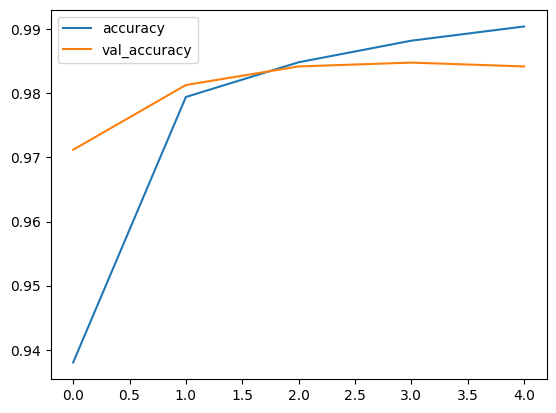

In [27]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

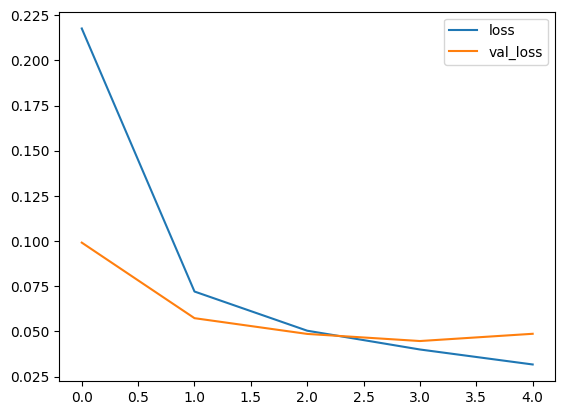

In [28]:
metrics[['loss','val_loss']].plot()

In [29]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 10ms/step


In [30]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 963    0    3    1    0    1    6    0    2    4]
 [   0 1127    2    1    1    0    2    0    2    0]
 [   0    2 1022    0    1    0    1    4    2    0]
 [   0    0    1 1001    0    3    0    1    3    1]
 [   1    0    2    0  965    0    5    0    1    8]
 [   1    0    0    6    0  879    3    0    3    0]
 [   2    2    1    0    2    2  947    0    2    0]
 [   0    2   14    1    0    0    0 1001    2    8]
 [   5    0    5    1    0    1    1    1  957    3]
 [   1    2    0    4    8    5    0    3    6  980]]


In [31]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [32]:
img = image.load_img('imagethree.jpg')

In [33]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [34]:
img = image.load_img('imagethree.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [41]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [42]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 47ms/step


In [43]:
print(x_single_prediction)

[3]


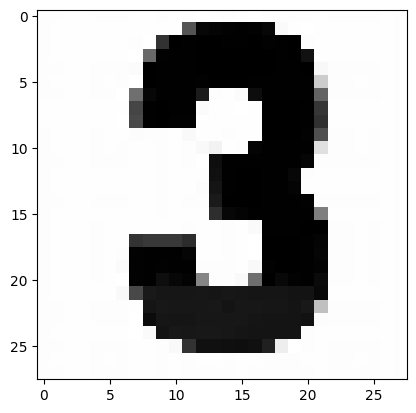

In [37]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')